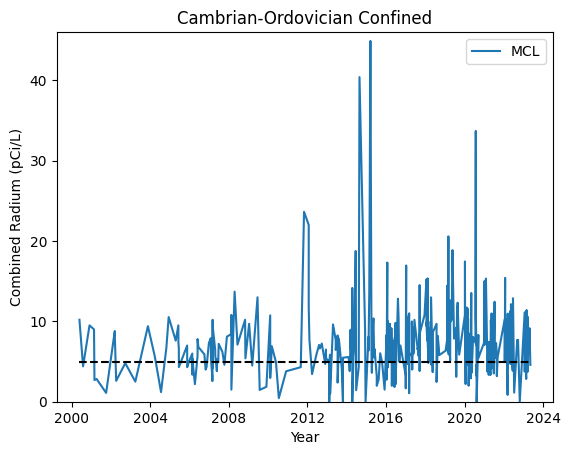

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                nan
Time:                        23:19:36   Log-Likelihood:                -1187.1
No. Observations:                 407   AIC:                             2376.
Df Residuals:                     406   BIC:                             2380.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.313e-36   1.01e-37     32.790      0.0

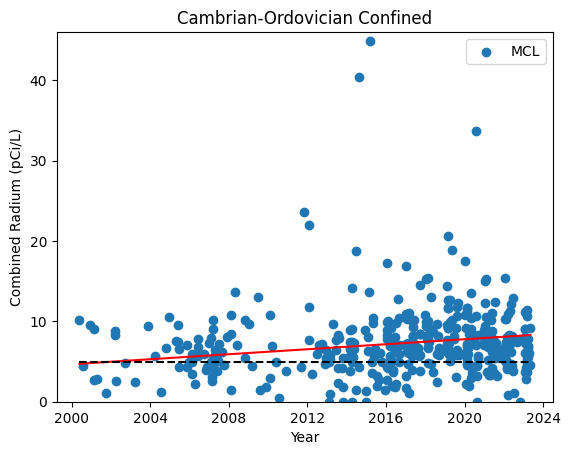

Sum of residuals: 20.643461168918


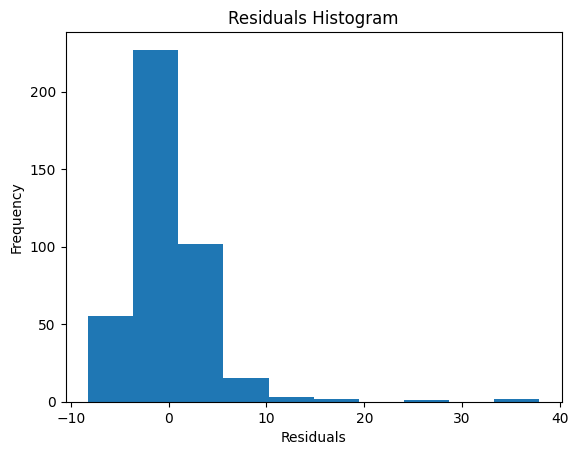

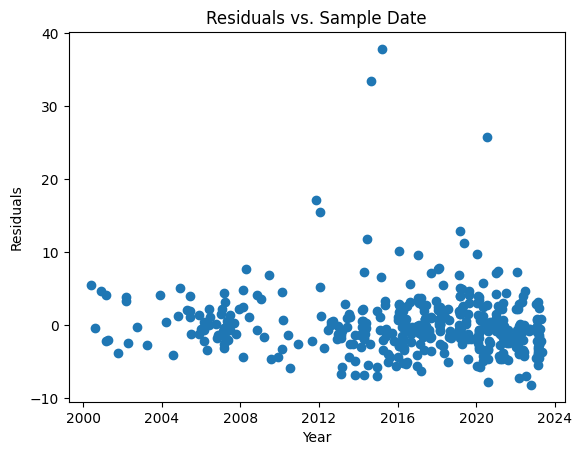

Theil-Sen Regression Summary:
Intercept: 5.3107457794354165
Slope: 0.00022510053835672687


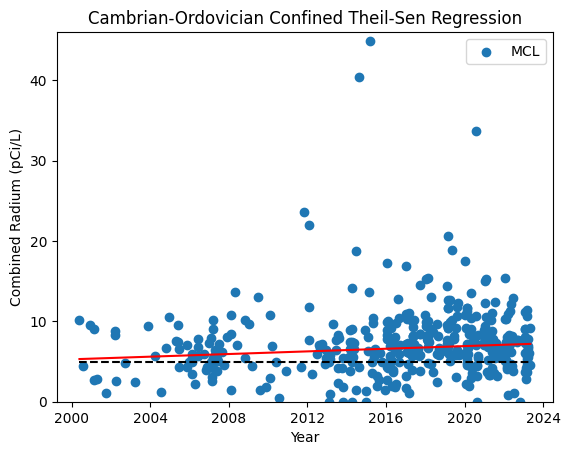

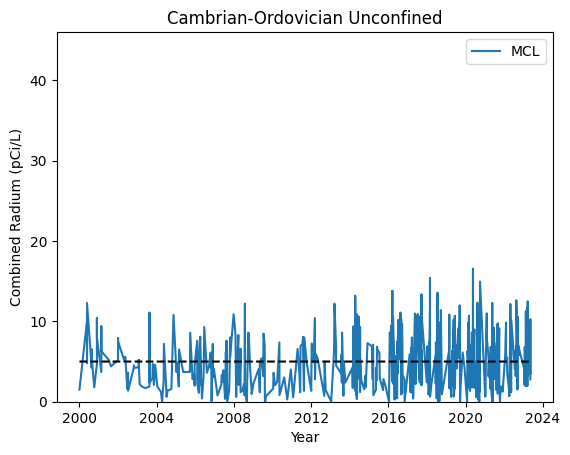

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                nan
Time:                        23:20:41   Log-Likelihood:                    nan
No. Observations:             1048485   AIC:                               nan
Df Residuals:                 1048484   BIC:                               nan
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

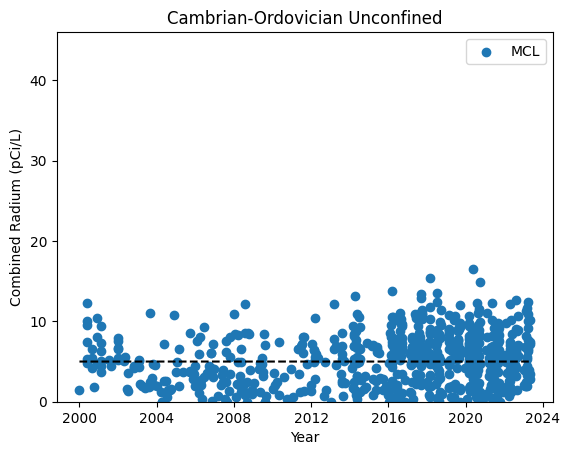

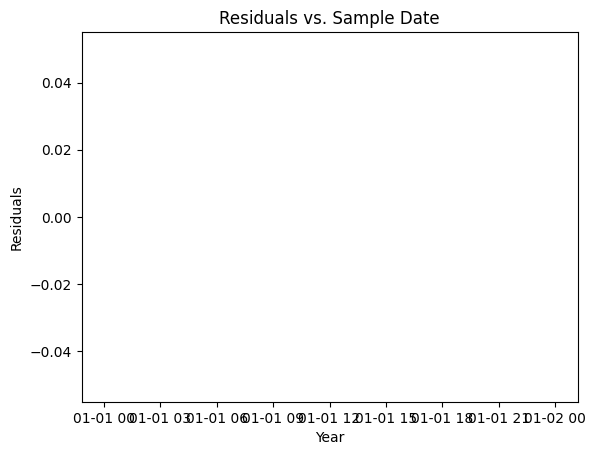

In [ ]:
import numpy as np
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import TheilSenRegressor
from sklearn.impute import SimpleImputer

#Read and access the Excel file for confined data
confined_data_file = 'Stats Merged and cleaned DNR data 00-23 CO_C and CO_U.xlsx'
confined_data_sheet = 'CO_C Max'
confined_data_wb = openpyxl.load_workbook(confined_data_file)
confined_data = confined_data_wb[confined_data_sheet].values
confined_data_columns = next(confined_data)[0:]
confined_data_df = pd.DataFrame(confined_data, columns=confined_data_columns)
confined_data_wb.close()

#Format dates
confined_data_df['Sample_Date'] = pd.to_datetime(confined_data_df['Sample_Date'], format="%Y-%m-%d")

#Plotting the data
plt.figure()
plt.plot(confined_data_df['Sample_Date'], confined_data_df['Measured_Amount'])
plt.xlabel("Year")
plt.ylabel("Combined Radium (pCi/L)")
plt.title("Cambrian-Ordovician Confined")
plt.ylim(0, 46)
plt.plot(confined_data_df['Sample_Date'], [5] * len(confined_data_df), 'k--')
plt.legend(["MCL"])
plt.show()

#Fit a linear model
X = confined_data_df['Sample_Date'].values.astype(float)
y = confined_data_df['Measured_Amount'].values.astype(float)
X = sm.add_constant(X)
linear_fit = sm.OLS(y, X).fit()

#Print linear model summary
print(linear_fit.summary())

#Plot linear fit model
plt.figure()
plt.scatter(confined_data_df['Sample_Date'], confined_data_df['Measured_Amount'])
plt.plot(confined_data_df['Sample_Date'], linear_fit.fittedvalues, 'r-')
plt.xlabel("Year")
plt.ylabel("Combined Radium (pCi/L)")
plt.title("Cambrian-Ordovician Confined")
plt.ylim(0, 46)
plt.plot(confined_data_df['Sample_Date'], [5] * len(confined_data_df), 'k--')
plt.legend(["MCL"])
plt.show()

#Check assumptions of linear regression
residuals = linear_fit.resid
print("Sum of residuals:", sum(residuals))
plt.figure()
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()

plt.figure()
plt.scatter(confined_data_df['Sample_Date'], residuals)
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.title("Residuals vs. Sample Date")
plt.show()

#Nonparametric linear regression - Theil-Sen estimator
days_since = (confined_data_df['Sample_Date'] - confined_data_df['Sample_Date'].iloc[0]).dt.days
ts_model = TheilSenRegressor()
ts_model.fit(days_since.values.reshape(-1, 1), y)

#Print Theil-Sen regression summary
print("Theil-Sen Regression Summary:")
print("Intercept:", ts_model.intercept_)
print("Slope:", ts_model.coef_[0])

#Plot Theil-Sen regression
plt.figure()
plt.scatter(confined_data_df['Sample_Date'], confined_data_df['Measured_Amount'])
plt.plot(confined_data_df['Sample_Date'], ts_model.predict(days_since.values.reshape(-1, 1)), 'r-')
plt.xlabel("Year")
plt.ylabel("Combined Radium (pCi/L)")
plt.title("Cambrian-Ordovician Confined Theil-Sen Regression")
plt.ylim(0, 46)
plt.plot(confined_data_df['Sample_Date'], [5] * len(confined_data_df), 'k--')
plt.legend(["MCL"])
plt.show()

#Read and access the Excel file for unconfined data
unconfined_data_file = 'Stats Merged and cleaned DNR data 00-23 CO_C and CO_U.xlsx'
unconfined_data_sheet = 'CO_U Max'
unconfined_data_wb = openpyxl.load_workbook(unconfined_data_file)
unconfined_data = unconfined_data_wb[unconfined_data_sheet].values
unconfined_data_columns = next(unconfined_data)[0:]
unconfined_data_df = pd.DataFrame(unconfined_data, columns=unconfined_data_columns)
unconfined_data_wb.close()

#Format dates
unconfined_data_df['Sample_Date'] = pd.to_datetime(unconfined_data_df['Sample_Date'], format="%Y-%m-%d")

#Plotting the data
plt.figure()
plt.plot(unconfined_data_df['Sample_Date'], unconfined_data_df['Measured_Amount'])
plt.xlabel("Year")
plt.ylabel("Combined Radium (pCi/L)")
plt.title("Cambrian-Ordovician Unconfined")
plt.ylim(0, 46)
plt.plot(unconfined_data_df['Sample_Date'], [5] * len(unconfined_data_df), 'k--')
plt.legend(["MCL"])
plt.show()

#Fit a linear model
X2 = unconfined_data_df['Sample_Date'].values.astype(float)
y2 = unconfined_data_df['Measured_Amount'].values.astype(float)
X2 = sm.add_constant(X2)
linear_fit2 = sm.OLS(y2, X2).fit()

#Print linear model summary
print(linear_fit2.summary())

#Plot linear fit model
plt.figure()
plt.scatter(unconfined_data_df['Sample_Date'], unconfined_data_df['Measured_Amount'])
plt.plot(unconfined_data_df['Sample_Date'], linear_fit2.fittedvalues, 'r-')
plt.xlabel("Year")
plt.ylabel("Combined Radium (pCi/L)")
plt.title("Cambrian-Ordovician Unconfined")
plt.ylim(0, 46)
plt.plot(unconfined_data_df['Sample_Date'], [5] * len(unconfined_data_df), 'k--')
plt.legend(["MCL"])
plt.show()

# Check assumptions of linear regression
residuals2 = linear_fit2.resid

# Remove NaN values from residuals and corresponding dates
valid_indices = ~np.isnan(residuals2)
residuals2 = residuals2[valid_indices]
dates = unconfined_data_df['Sample_Date'][valid_indices]

plt.figure()
plt.scatter(dates, residuals2)
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.title("Residuals vs. Sample Date")
plt.show()

#Nonparametric linear regression - Theil-Sen estimator
days_since2 = (unconfined_data_df['Sample_Date'] - unconfined_data_df['Sample_Date'].iloc[0]).dt.days

# Impute missing values in days_since2
imputer = SimpleImputer()
days_since2_imputed = imputer.fit_transform(days_since2.values.reshape(-1, 1))
y2_imputed = imputer.fit_transform(y2.reshape(-1, 1))

# Fit Theil-Sen regression with imputed data
ts_model2 = TheilSenRegressor()
ts_model2.fit(days_since2_imputed, y2_imputed.flatten())


# Print Theil-Sen regression summary
print("Theil-Sen Regression Summary:")
print("Intercept:", ts_model2.intercept_)
print("Slope:", ts_model2.coef_[0])

#Plot Theil-Sen regression
plt.figure()
plt.scatter(unconfined_data_df['Sample_Date'], unconfined_data_df['Measured_Amount'])
plt.plot(unconfined_data_df['Sample_Date'], ts_model2.predict(days_since2.values.reshape(-1, 1)), 'r-')
plt.xlabel("Year")
plt.ylabel("Combined Radium (pCi/L)")
plt.title("Cambrian-Ordovician Unconfined Theil-Sen Regression")
plt.ylim(0, 46)
plt.plot(unconfined_data_df['Sample_Date'], [5] * len(unconfined_data_df), 'k--')
plt.legend(["MCL"])
plt.show()